In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


In [2]:
import spectools_ir
spectools_ir.__file__

'C:\\Users\\ksn70\\python\\lib\\site-packages\\spectools_ir\\__init__.py'

In [3]:
hitran_data=extract_hitran_data('CO',4.65,5.097,isotopologue_number=2,vup=1)

get hitran data

Read in disk data and plot

In [4]:
infile='C:\\Users\\ksn70\\mypy\\rawdata\\nirspec_fztau.dat'

wave , flux = np.loadtxt(infile, unpack=True, skiprows=21)
print(wave,flux)

[4.6501369 4.6502299 4.6503229 ... 5.1015058 5.1016078 5.1017098] [1.4667217 1.4326959 1.3973608 ...       nan       nan       nan]


Text(0, 0.5, 'Flux [Jy]')

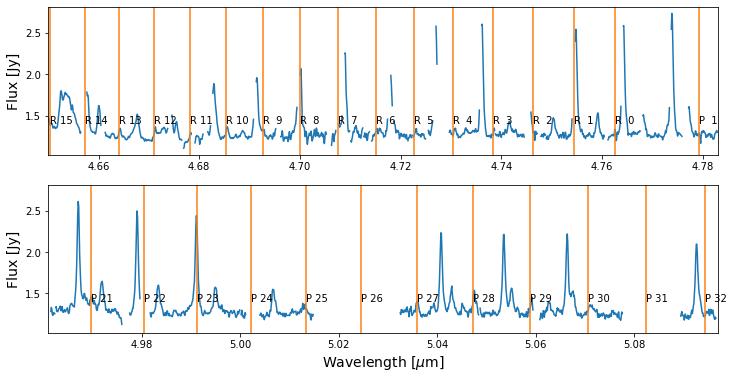

In [5]:
#Plot spectrum.
#The wavelength gap between the two plots is due to a section of poor atmosphere observations

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(211)
ax1.plot(wave,flux)
ax1.set_xlim(4.65,4.783) #first half of wavelength range 
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.65) & (mywave<4.783) ):
        ax1.axvline(mywave,color='C1')
        ax1.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax1.set_ylabel('Flux [Jy]',fontsize=14)

ax2=fig.add_subplot(212)
ax2.plot(wave,flux)
ax2.set_xlim(4.961,5.097) #second half of wavelength range 
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.961) & (mywave<5.097) ):
        ax2.axvline(mywave,color='C1')
        ax2.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=14)
ax2.set_ylabel('Flux [Jy]',fontsize=14)

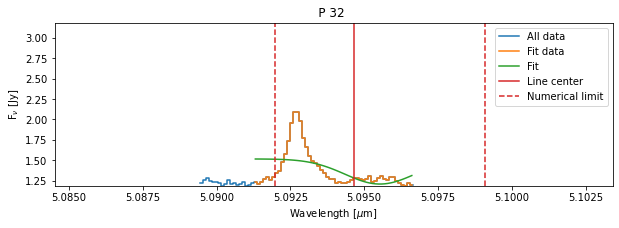

Is this fit okay? [y or n]n
Not enough data near  5.0826775072289685  microns. Skipping.


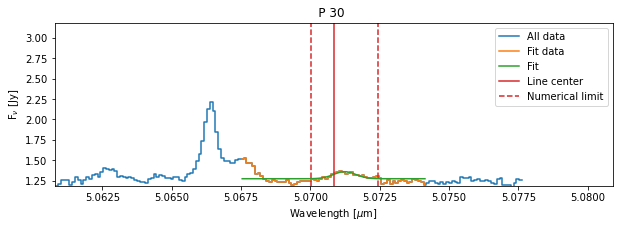

Is this fit okay? [y or n]y


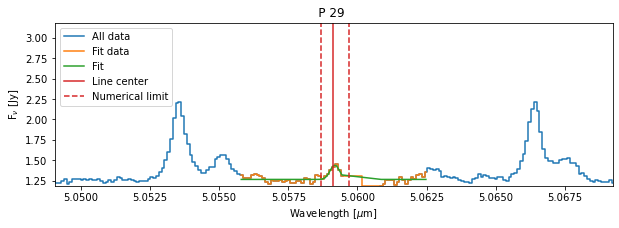

Is this fit okay? [y or n]y


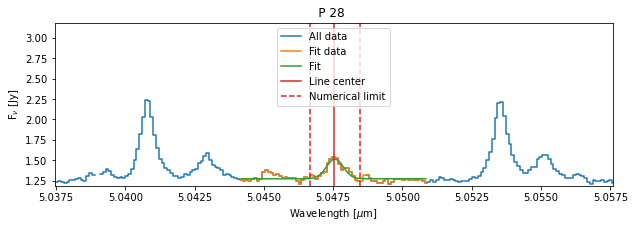

Is this fit okay? [y or n]y


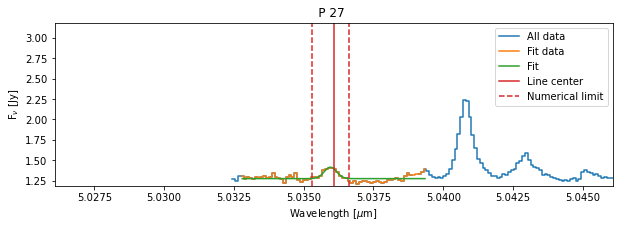

Is this fit okay? [y or n]y
Not enough data near  5.024739847438183  microns. Skipping.


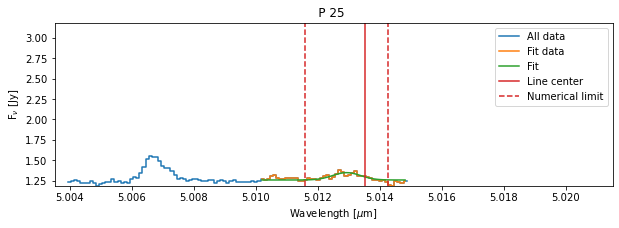

Is this fit okay? [y or n]n
Error - curve_fit failed


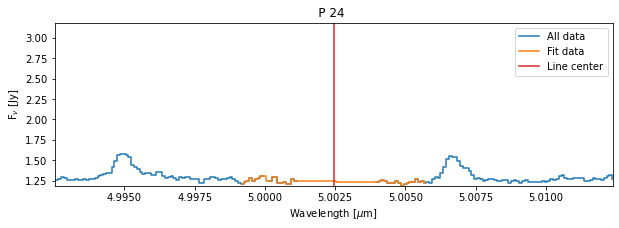

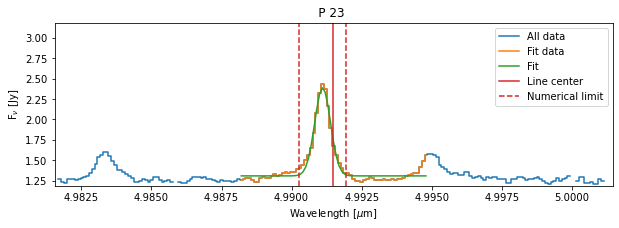

Is this fit okay? [y or n]y


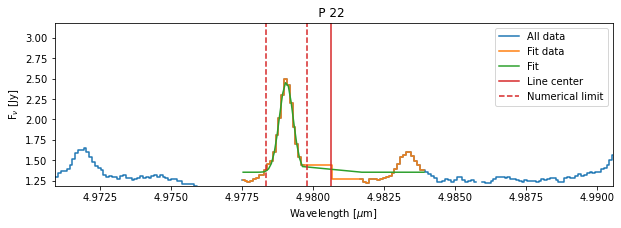

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:154: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(fitcovariance))


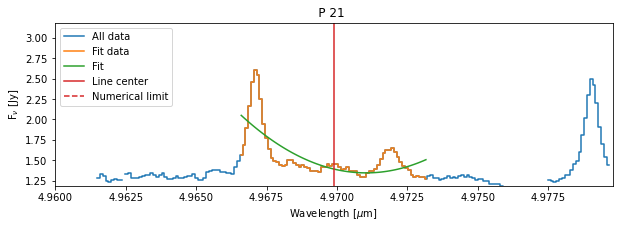

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


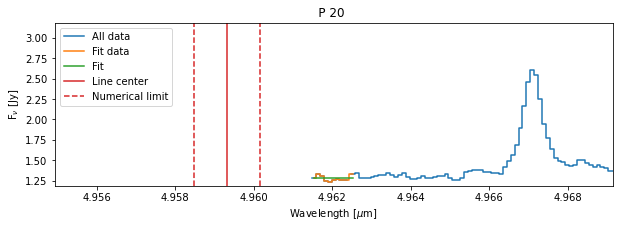

Is this fit okay? [y or n]n
Not enough data near  4.948825004183861  microns. Skipping.
Not enough data near  4.938458522544723  microns. Skipping.
Not enough data near  4.928208871854645  microns. Skipping.
Not enough data near  4.918075575252608  microns. Skipping.
Not enough data near  4.908057202155565  microns. Skipping.
Not enough data near  4.898153275702497  microns. Skipping.
Not enough data near  4.888363319032389  microns. Skipping.
Not enough data near  4.878685424701174  microns. Skipping.
Not enough data near  4.869120546430884  microns. Skipping.
Not enough data near  4.859665823055423  microns. Skipping.
Not enough data near  4.850321731435804  microns. Skipping.
Not enough data near  4.841088271572028  microns. Skipping.
Not enough data near  4.831962582297996  microns. Skipping.
Not enough data near  4.822945617335742  microns. Skipping.
Not enough data near  4.814036422963232  microns. Skipping.
Not enough data near  4.805234045458433  microns. Skipping.
Not enough d

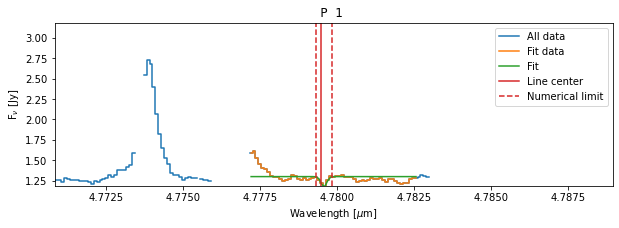

Is this fit okay? [y or n]n


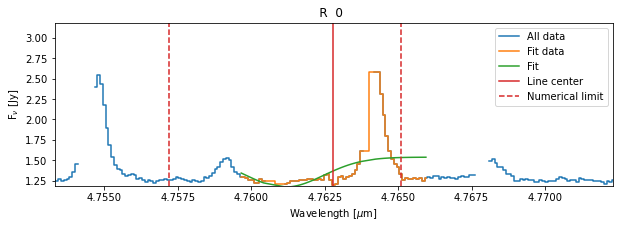

Is this fit okay? [y or n]n


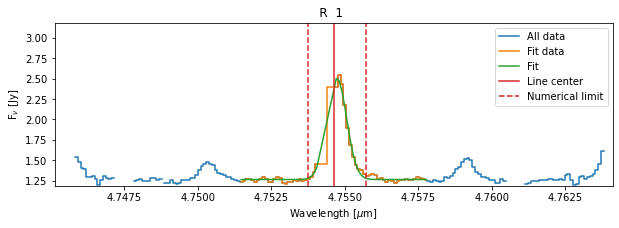

Is this fit okay? [y or n]y


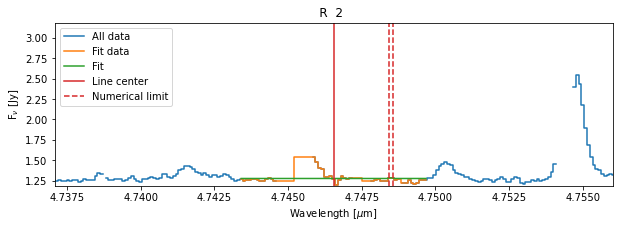

Is this fit okay? [y or n]n


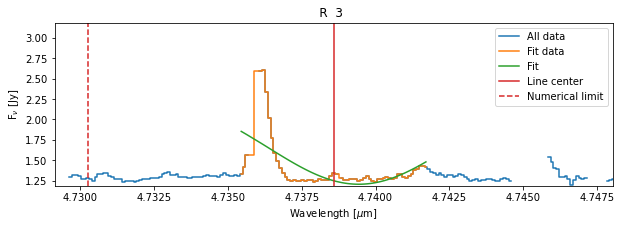

Is this fit okay? [y or n]n


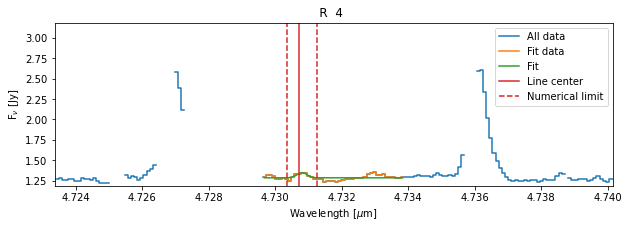

Is this fit okay? [y or n]n


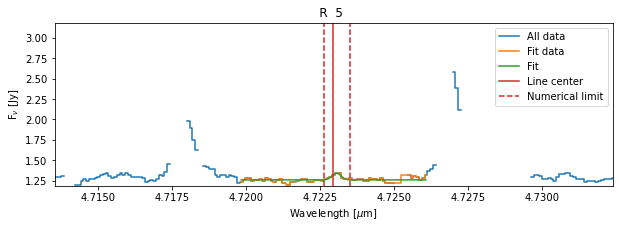

Is this fit okay? [y or n]n


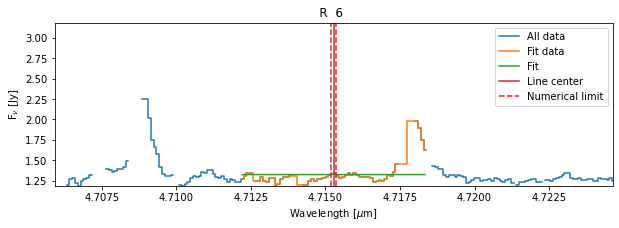

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


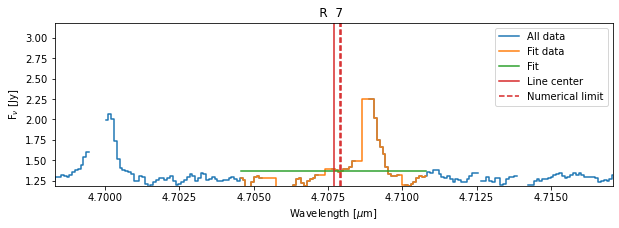

Is this fit okay? [y or n]n


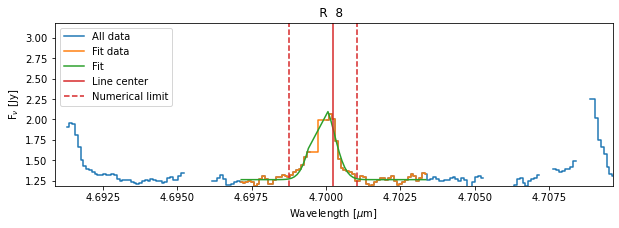

Is this fit okay? [y or n]y


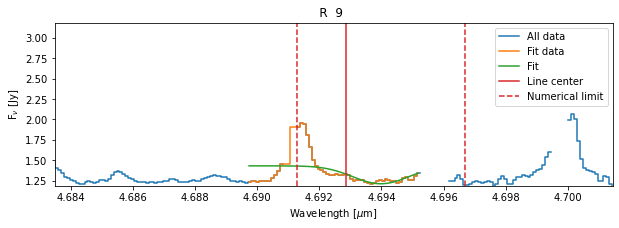

Is this fit okay? [y or n]n


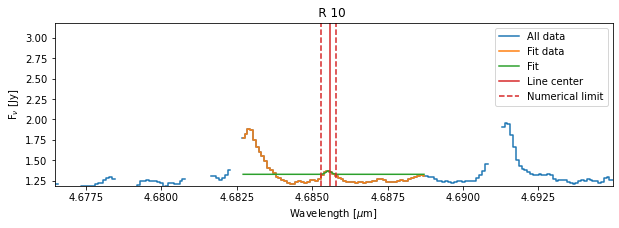

Is this fit okay? [y or n]n


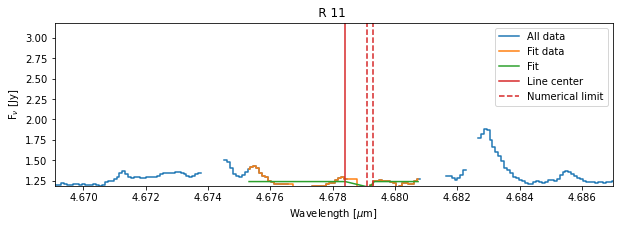

Is this fit okay? [y or n]n


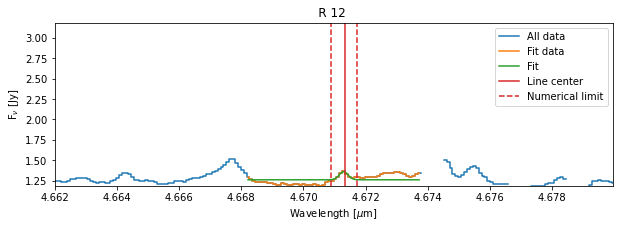

Is this fit okay? [y or n]n


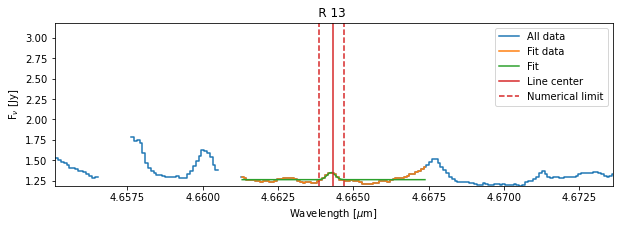

Is this fit okay? [y or n]y


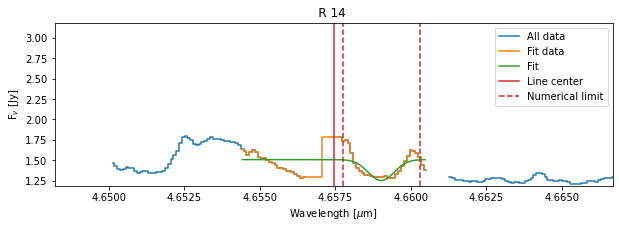

Is this fit okay? [y or n]n


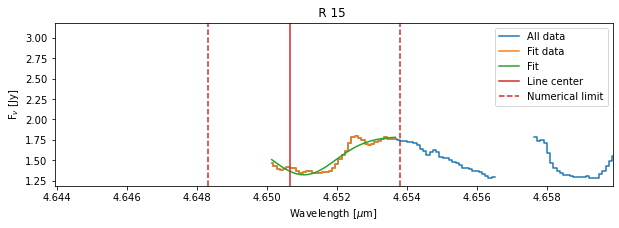

Is this fit okay? [y or n]n


In [6]:
#Calculate fluxes.
lineflux_data_fz13=calc_fluxes(wave,flux,hitran_data, v_dop=15,fwhm_v=40.,sep_v=200.,cont=1.05,vet_fits=True, plot=True)
pickle.dump(lineflux_data_fz13,open('lineflux_data_fz13.p','wb')) #save for convenience

#lineflux_data_fz13=pickle.load(open('lineflux_data_fz13.p','rb'))  #restore lineflux_data if you don't want to re-run

In [7]:
lineflux_data_fz13

molec_id,local_iso_id,wn,a,elower,Vp_HITRAN,Vpp_HITRAN,Qp_HITRAN,Qpp_HITRAN,gup,glow,nu,eup_k,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
,,,,,,,,,,,,,,W / m2,,W / m2,km / s,km / s,km / s,km / s,Jy,Jy
int32,int32,float32,float32,float32,bytes15,bytes15,bytes15,bytes15,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,2,1972.1604,13.54,1704.4802,1,0,,P 30,118.0,122.0,59123882000000.0,5289.865,5.0705814,1.0142705788340339e-17,1.0104296408604941e-17,7.82917409228013e-18,55.55347510252858,25.563332524244274,38.83644827332538,10.102884494811637,1.2735370147963077,0.010318256576145504
5,2,1976.7268,13.64,1594.8053,1,0,,P 29,114.0,118.0,59260780000000.0,5138.6377,5.058868,8.550741660640247e-18,8.792465373521066e-18,1.8589622136426876e-18,23.479088367922145,4.677153393190473,18.615982836394718,1.842503831616972,1.2651209606434686,0.00572780335853124
5,2,1981.2644,13.75,1488.7479,1,0,,P 28,110.0,114.0,59396814000000.0,4992.5728,5.0472817,2.1766858894253052e-17,2.1724722567593943e-17,3.220419643271123e-18,42.434062064840475,4.183139443695679,16.571686273449156,1.689619520624416,1.2730313796227075,0.005292018600409258
5,2,1985.773,13.85,1386.3121,1,0,,P 27,106.0,110.0,59531975000000.0,4851.6777,5.0358224,9.330895538183863e-18,9.237955214776199e-18,2.3394458506678764e-18,30.814985923506445,6.002278796431973,8.102964233770908,2.4619468394034927,1.2748951651587348,0.005124716005686468
5,2,2003.515,14.26,1012.857,1,0,,P 23,90.0,94.0,60063870000000.0,4339.886,4.991228,9.46798278844261e-17,9.179947270292264e-17,5.042574304806867e-18,39.829177146078266,1.494029437264397,-7.226860738820878,0.6059646394725676,1.3083918647103456,0.00848957460472176
5,2,2103.3206,12.93,3.6759,1,0,,R 1,10.0,6.0,63055967000000.0,3031.4973,4.754387,1.1966153946727636e-16,1.365426005357834e-16,3.7364843780024645e-18,49.08300264610857,1.3037282288260619,21.771940635733905,0.7817245279067305,1.2641117313610328,0.005128277837581982
5,2,2127.6619,15.87,132.305,1,0,,R 8,38.0,34.0,63785700000000.0,3251.5876,4.699995,8.110868993450992e-17,1.1755633135999633e-16,6.434510235101139e-18,57.06289005658819,2.302516069705464,-5.535072182649182,1.0411247551103486,1.2623384782585707,0.007682224029903563
5,2,2144.0334,16.57,334.3256,1,0,,R 13,58.0,54.0,64276510000000.0,3565.8054,4.6641064,4.044933805154713e-18,4.275553925229786e-18,1.941715140952478e-18,20.808717600463467,8.723793550151054,10.018699090718387,3.622363161262969,1.2621369617059661,0.0055315801486967645


Text(0, 0.5, 'Line flux [10$^{-16}$ W m$^{-2}$]')

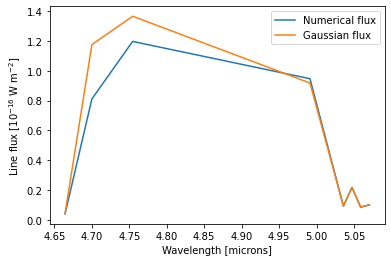

In [8]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineflux_data_fz13['wave'],lineflux_data_fz13['lineflux']*1e16, label='Numerical flux')
ax1.plot(lineflux_data_fz13['wave'],lineflux_data_fz13['lineflux_Gaussian']*1e16 ,label='Gaussian flux')
ax1.legend()
ax1.set_xlabel('Wavelength [microns]')
ax1.set_ylabel(r'Line flux [10$^{-16}$ W m$^{-2}$]')

### Creating "composite lineshape" with info from flux_calculator output

In [9]:
lineshape_data=make_lineshape(wave,flux,lineflux_data_fz13)

Text(0, 0.5, 'Arbitrary flux')

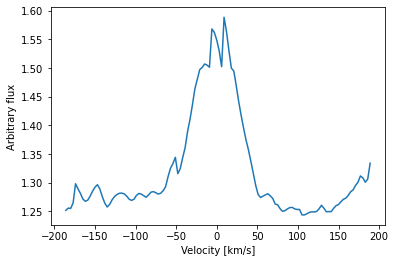

In [10]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineshape_data[0],lineshape_data[1])

ax1.set_xlabel('Velocity [km/s]')
ax1.set_ylabel('Arbitrary flux')

### "Display resultant fluxes in a rotation diagram"

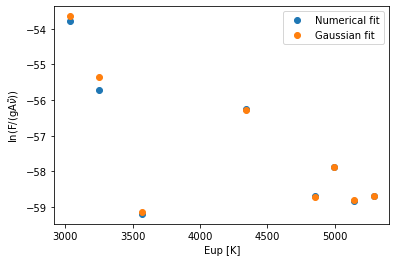

In [11]:
rot_numerical=make_rotation_diagram(lineflux_data_fz13,fluxkey='lineflux')
rot_Gaussian=make_rotation_diagram(lineflux_data_fz13,fluxkey='lineflux_Gaussian')

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rot_numerical['x'],rot_numerical['y'],'C0o',label='Numerical fit')
ax1.plot(rot_Gaussian['x'],rot_Gaussian['y'],'C1o', label='Gaussian fit')

ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.legend()

### Slabspec

In [12]:
au=1.5e11
#Make slab model
#This can take a few seconds to run.  It is primarily limited by the convolution time.
model_output=make_spec('CO',1e22,1000,np.pi*(0.3*au)**2., wmin=4.64,wmax=5.1,convol_fwhm=30.,d_pc=140.,res=1e-5,vup=1)

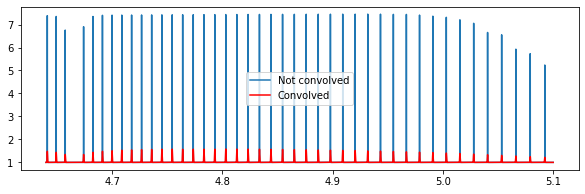

In [13]:
#Plot slab model
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='Not convolved')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'r',label='Convolved')
ax1.legend()

### Output model as rotation diagram

In [14]:
rd_model=make_rotation_diagram(model_output['lineparams'])
rd_data=make_rotation_diagram(lineflux_data_fz13)

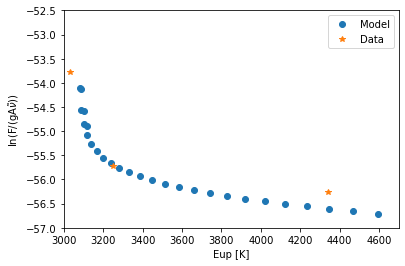

In [15]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rd_model['x'],rd_model['y'],' C0o',label='Model')
ax1.plot(rd_data['x'],rd_data['y'],' C1*',label='Data')
ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.set_xlim(3000,4700)
ax1.set_ylim(-57,-52.5)
ax1.legend()

### Slab_fitter

In [16]:
myconfig=Config('C:\\Users\\ksn70\\mypy\\configfz_tau.json')  #reads config.json by default, or can specify path to file as input parameter
myconfig.display()

data=lineflux_data_fz13

mydata=LineData(data)
myretrieval=Retrieval(myconfig,mydata)

{
 "tmin": 500,
 "tmax": 2500,
 "lognmin": 19,
 "lognmax": 24,
 "logomegamin": -20,
 "logomegamax": -10,
 "Nwalkers": 20,
 "Nburnin": 1000,
 "Nsamples": 3000
}


### Run Retrieval

In [17]:
mychain_fz13=myretrieval.run_emcee()  #Run retrieval.  May take a while, depending on number of samples
pickle.dump(mychain_fz13,open('test_chain.p','wb'))  #Save for convenience and later retrieval
os.system('afplay /System/Library/Sounds/Sosumi.aiff')

mychain_fz13=pickle.load(open('test_chain.p','rb'))  
postsamples=get_samples(mychain_fz13,myconfig.getpar('Nburnin'))  #Get list of samples, after removing burnin, from chain

Number of total samples: 60000
Run time [s]: 230.95240020751953


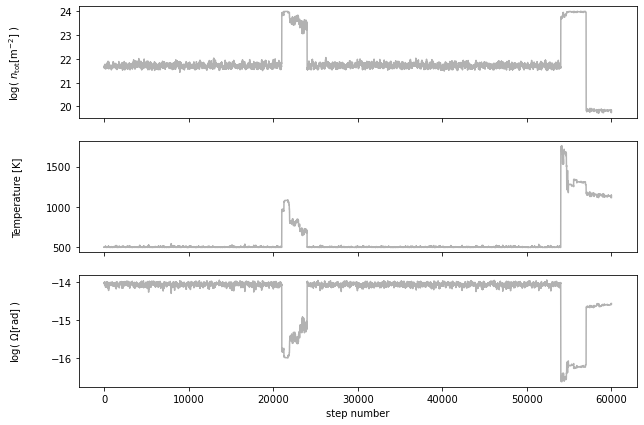

In [18]:
#Trace plot - examine samples
trace_plot(postsamples)

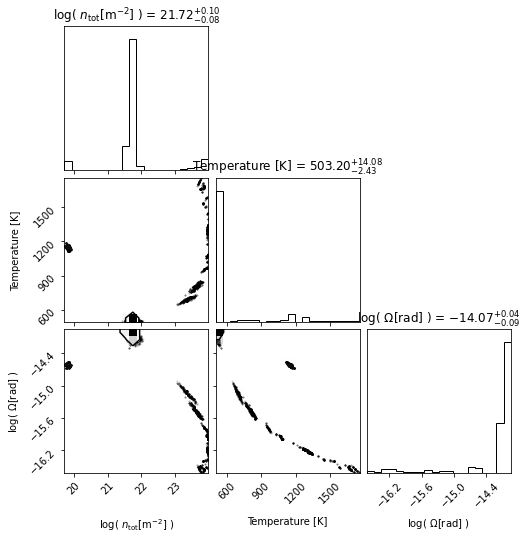

In [19]:
#Corner plot - see posterior distributions
fig=corner_plot(postsamples)

In [27]:
#Best fit parameters - best fit parameters plus/minus 1-sigma intervals
best_fit=find_best_fit(postsamples,show=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

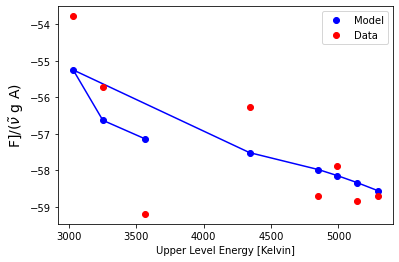

In [20]:
#Rotation diagram
modelflux=compute_model_fluxes(mydata,postsamples) #Compute model fluxes for ecah line in data
rotdiag=mydata.rot_diagram(modelfluxes=modelflux,units='mks') #Rotation diagram for data and model

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rotdiag['x'],rotdiag['modely'],'bo',label='Model')
ax1.plot(rotdiag['x'],rotdiag['modely'],'b',label='_None_')
ax1.plot(rotdiag['x'],rotdiag['y'],'ro',label='Data')

ax1.set_xlabel('Upper Level Energy [Kelvin]')
#ax1.set_ylabel(r'F[W m$^{-2}$]/($\~{\nu}$ [m$^{-1}$]g A[s$^{-1}$])',fontsize=14)
ax1.set_ylabel(r'F]/($\~{\nu}$ g A)',fontsize=14)
ax1.legend()